In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import flow.visualize.visualize_ring as visualize_ring

import torch
print(torch.__version__)

# Anti-Flow specific functions for  detection:
from Detectors.Deep_Learning.AutoEncoders.utils import sliding_window
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder

print('Libraries loaded.')

1.7.1
Libraries loaded.


# Setting up ring-road simulations:

In [70]:
from detector_dev.utils import run_ring_sim_variable_cfm,Bando_OVM_FTL

from Adversaries.controllers.car_following_adversarial import ACC_Benign

import detector_dev.utils as utils

import Data_Processing.sim_processing_utils as sim_processing_utils

from Data_Processing.sim_processing_utils import get_trajectory_timeseries

from importlib import reload

In [71]:
#Run with just one class of driver:
driver_controller_list = []
num_human_drivers = 40

# a=0.8
# b=20.0
# s0=1.0
# s1=2.0
# Vm=20.0

a=0.666
b=21.6
s0=2.21
s1=2.82
Vm=18.94


label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
driver_controller_list.append([label,cfm_controller,num_human_drivers])


ring_length = 500
sim_time = 100

print('CFM list initialized.')


sim_res_list_all_human = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                          ring_length=ring_length,
                                                          sim_time=sim_time)


emission_path = os.path.join(os.getcwd(),sim_res_list_all_human[1])

reload(sim_processing_utils)

trajectory_dict_all_human = get_trajectory_timeseries(csv_path = emission_path)

CFM list initialized.
Number of classes of driver: 1
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 381.15032285722
data/ring_variable_cfm_20230108-1904401673226280.564116-0_emission.csv data
Average, std velocities: 10.121661532270148, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 381.15032285722, 0.0
Total time: 9.050291061401367
steps/second: 129.40054257062866
Data loaded, total time: 0.35535168647766113


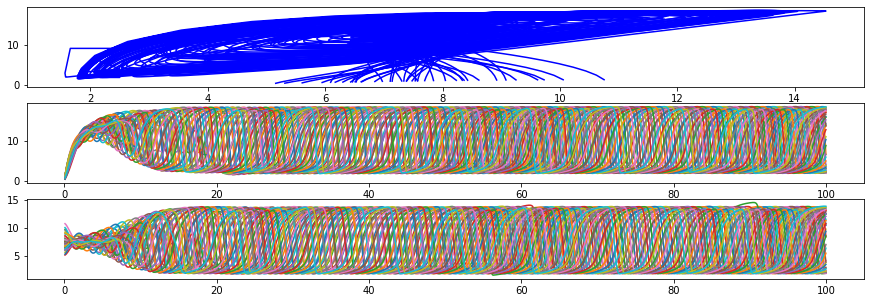

In [74]:
begin_time = 0.0
end_time = 500.0

veh_ids = (trajectory_dict_all_human.keys())
plt.figure(figsize=[15,5])

plt.subplot(3,1,1)

for veh_id in veh_ids:
    time = trajectory_dict_all_human[veh_id][:,0]
    index_select = np.logical_and(time>begin_time,time<end_time)
    
    time = time[index_select]
    
    speed = trajectory_dict_all_human[veh_id][:,1]
    spacing = trajectory_dict_all_human[veh_id][:,2]
    
    speed = speed[index_select]
    spacing = spacing[index_select]
    
    plt.subplot(3,1,1)
    plt.plot(spacing,speed,'b')
    
    plt.subplot(3,1,2)
    plt.plot(time,speed)
    
    plt.subplot(3,1,3)
    plt.plot(time,spacing)

# Look to control waves with a Follower Stopper smoother:

In [77]:
from flow.controllers.velocity_controllers import FollowerStopper

In [84]:
#Run with just one class of driver:
driver_controller_list = []
num_human_drivers = 39

a=0.666
b=21.6
s0=2.21
s1=2.82
Vm=18.94


label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
driver_controller_list.append([label,cfm_controller,num_human_drivers])


v_des = 3.0
fstop_controller = (FollowerStopper,{'v_des':v_des})
label = 'FollowerStopper_Vdes_'+str(v_des)
driver_controller_list.append([label,fstop_controller,1])

ring_length = 500
sim_time = 100


sim_res_list_1_smoother = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                          ring_length=ring_length,
                                                          sim_time=sim_time)


emission_path = os.path.join(os.getcwd(),sim_res_list_1_smoother[1])

reload(sim_processing_utils)

trajectory_dict_1_smoother = get_trajectory_timeseries(csv_path = emission_path)

Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 299.46604950399427
data/ring_variable_cfm_20230109-1209551673287795.399474-0_emission.csv data
Average, std velocities: 3.591209337511963, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 299.46604950399427, 0.0
Total time: 8.364941835403442
steps/second: 139.37313667436445
Data loaded, total time: 0.3247978687286377


In [86]:
def sim_fstop(v_des):
    #Run with just one class of driver:
    driver_controller_list = []
    num_human_drivers = 39

    a=0.666
    b=21.6
    s0=2.21
    s1=2.82
    Vm=18.94


    label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
    driver_controller_list.append([label,cfm_controller,num_human_drivers])


    fstop_controller = (FollowerStopper,{'v_des':v_des})
    label = 'FollowerStopper_Vdes_'+str(v_des)
    driver_controller_list.append([label,fstop_controller,1])

    ring_length = 500
    sim_time = 100


    sim_res_list_1_smoother = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                              ring_length=ring_length,
                                                              sim_time=sim_time)


    emission_path = os.path.join(os.getcwd(),sim_res_list_1_smoother[1])

    reload(sim_processing_utils)

    trajectory_dict_1_smoother = get_trajectory_timeseries(csv_path = emission_path)
    
    return trajectory_dict_1_smoother
print('Sim function defined.')

Sim function defined.


In [89]:
v_des_vals = np.linspace(1.0,15.0,15)
sim_sweep_results = []
for v_des in v_des_vals:
    sim_sweep_results.append(sim_fstop(v_des))
print('All simulations finished.')

Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 132.30786230034502
data/ring_variable_cfm_20230109-1221191673288479.9265862-0_emission.csv data
Average, std velocities: 1.8580513397232445, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 132.30786230034502, 0.0
Total time: 9.701065301895142
steps/second: 138.69446645142145
Data loaded, total time: 0.4020810127258301
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 211.90577319411412
data/ring_variable_cfm_20230109-1221311673288491.261899-0_emission.csv data
Average, std velocities: 2.690545346961104, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 211.90577319411412, 0.0
Total time: 8.784615278244019
steps/second: 135.17748962313536
Data loaded, total time: 0.36931324005126953
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 300.80898485004997
data/ring_variable_cfm_20230109-1221411673288501.5980392-0_emission.csv data
Average, std velocities: 3.5716933045824444, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 300.80898485004997, 0.0
Total time: 8.487424850463867
steps/second: 137.37104104532762
Data loaded, total time: 0.3390007019042969
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 393.1441558617373
data/ring_variable_cfm_20230109-1221511673288511.54236-0_emission.csv data
Average, std velocities: 4.502105456707617, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 393.1441558617373, 0.0
Total time: 8.584220170974731
steps/second: 136.26027402970877
Data loaded, total time: 0.3259248733520508
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 468.31402083431135
data/ring_variable_cfm_20230109-1222011673288521.5713332-0_emission.csv data
Average, std velocities: 5.433222644271161, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 468.31402083431135, 0.0
Total time: 9.306978940963745
steps/second: 132.3641325657889
Data loaded, total time: 0.3096177577972412
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 527.3392294578906
data/ring_variable_cfm_20230109-1222121673288532.301595-0_emission.csv data
Average, std velocities: 6.356162598202565, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 527.3392294578906, 0.0
Total time: 8.925858974456787
steps/second: 133.14621524397063
Data loaded, total time: 0.3123960494995117
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 586.6449356084057
data/ring_variable_cfm_20230109-1222221673288542.655071-0_emission.csv data
Average, std velocities: 7.2794052184306635, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 586.6449356084057, 0.0
Total time: 8.603455066680908
steps/second: 135.79467238212172
Data loaded, total time: 0.3063950538635254
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 627.4856381975744
data/ring_variable_cfm_20230109-1222321673288552.6854038-0_emission.csv data
Average, std velocities: 8.194108936942404, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 627.4856381975744, 0.0
Total time: 8.498358011245728
steps/second: 135.61179990668438
Data loaded, total time: 0.3076589107513428
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 540.5566447156906
data/ring_variable_cfm_20230109-1222421673288562.61097-0_emission.csv data
Average, std velocities: 8.92527101806652, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 540.5566447156906, 0.0
Total time: 9.45876693725586
steps/second: 130.93946887155633
Data loaded, total time: 0.32764291763305664
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 486.57556036125857
data/ring_variable_cfm_20230109-1222531673288573.5121112-0_emission.csv data
Average, std velocities: 9.281216107106008, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 486.57556036125857, 0.0
Total time: 9.056055068969727
steps/second: 130.84421719508063
Data loaded, total time: 0.3169870376586914
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 446.36204063411344
data/ring_variable_cfm_20230109-1223041673288584.000442-0_emission.csv data
Average, std velocities: 9.523132907489599, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 446.36204063411344, 0.0
Total time: 8.697796106338501
steps/second: 132.757368898943
Data loaded, total time: 0.31666016578674316
Number of classes of driver: 2
Running ring simulation, ring length: 500


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 406.27386977753486
data/ring_variable_cfm_20230109-1223141673288594.136628-0_emission.csv data
Average, std velocities: 9.568771631207579, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 406.27386977753486, 0.0
Total time: 8.553184986114502
steps/second: 134.6841929050319
Data loaded, total time: 0.305070161819458
Number of classes of driver: 2
Running ring simulation, ring length: 500
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 404.7693291907942
data/ring_variable_cfm_20230109-1223241673288604.1257112-0_emission.csv data
Average, std velocities: 9.758938960020364, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 404.7693291907942, 0.0
Total time: 8.741188049316406
steps/second: 133.3835213514445
Data loaded, total time: 0.3047187328338623
Number of classes of driver: 2
Running ring simulation, ring length: 500
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 334.14106092516846
data/ring_variable_cfm_20230109-1223341673288614.287222-0_emission.csv data
Average, std velocities: 9.529027113799895, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 334.14106092516846, 0.0
Total time: 8.514656066894531
steps/second: 136.86233103463186
Data loaded, total time: 0.3076438903808594
Number of classes of driver: 2
Running ring simulation, ring length: 500
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 306.68055192887897
data/ring_variable_cfm_20230109-1223441673288624.223388-0_emission.csv data
Average, std velocities: 9.584596784496823, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 306.68055192887897, 0.0
Total time: 8.538086891174316
steps/second: 137.395261084895
Data loaded, total time: 0.31311821937561035
All simulations finished.


Text(0.5, 0, 'Desired control velocity')

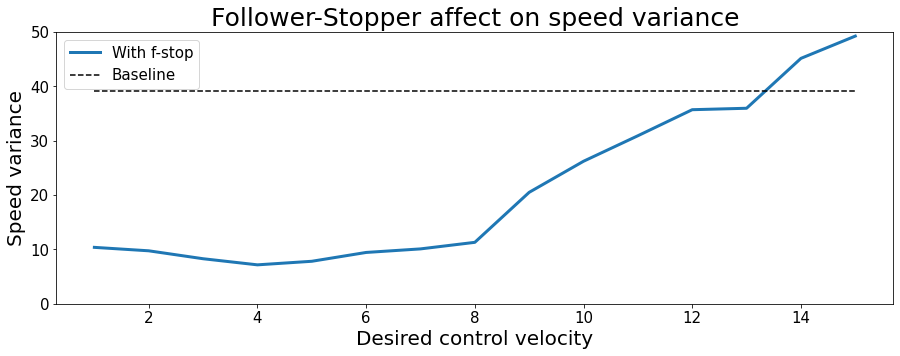

In [106]:
def get_speed_var(trajcetory_dict,begin_time=50.0):
    speed_vars = []
    for veh_id in trajcetory_dict:
        time = trajcetory_dict[veh_id][:,0]
        index_select = time>begin_time

        time = time[index_select]
        speed = trajcetory_dict[veh_id][:,1]
        
        speed_vars.append(np.var(speed))
    return np.mean(speed_vars)

baseline_speed_var = get_speed_var(trajectory_dict_all_human)


sim_sweep_speed_vars = []
for trajectory_dict in sim_sweep_results:
    sim_sweep_speed_vars.append(get_speed_var(trajectory_dict))

plt.figure(figsize=[15,5])
plt.plot(v_des_vals,sim_sweep_speed_vars,linewidth=3.0,label='With f-stop')
plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_var,'k--',label='Baseline')
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim([0,50])
plt.title('Follower-Stopper affect on speed variance',fontsize=25)
plt.ylabel('Speed variance',fontsize=20)
plt.xlabel('Desired control velocity',fontsize=20)

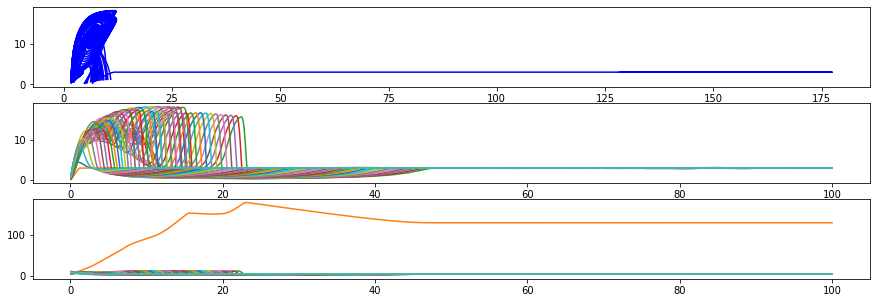

In [85]:
begin_time = 0.0
end_time = 500.0

veh_ids = (trajectory_dict_1_smoother.keys())
plt.figure(figsize=[15,5])

plt.subplot(3,1,1)

for veh_id in veh_ids:
    time = trajectory_dict_1_smoother[veh_id][:,0]
    index_select = np.logical_and(time>begin_time,time<end_time)
    
    time = time[index_select]
    
    speed = trajectory_dict_1_smoother[veh_id][:,1]
    spacing = trajectory_dict_1_smoother[veh_id][:,2]
    
    speed = speed[index_select]
    spacing = spacing[index_select]
    
    plt.subplot(3,1,1)
    plt.plot(spacing,speed,'b')
    
    plt.subplot(3,1,2)
    plt.plot(time,speed)
    
    plt.subplot(3,1,3)
    plt.plot(time,spacing)

# Add in another vehicle as an attacker:

In [109]:
from Adversaries.controllers.car_following_adversarial import ACC_Switched_Controller_Attacked

In [127]:
def sim_fstop_with_attacker(v_des):
    #Run with just one class of driver:
    driver_controller_list = []
    num_human_drivers = 38

    a=0.666
    b=21.6
    s0=2.21
    s1=2.82
    Vm=18.94


    label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
    driver_controller_list.append([label,cfm_controller,num_human_drivers])

    # follower-stopper
    fstop_controller = (FollowerStopper,{'v_des':v_des})
    label = 'FollowerStopper_Vdes_'+str(v_des)
    driver_controller_list.append([label,fstop_controller,1])



    #attack vehicle:

    k_1_mean = 1.5
    k_2_mean = 0.2
    h_mean = 1.8
    V_m_mean = 15.0
    d_min_mean = 10.0
    k_1 = k_1_mean# + np.random.normal(0,0.2)
    k_2 = k_2_mean# + np.random.normal(0,0.2)
    h = h_mean# + np.random.normal(0,0.2)
    V_m = V_m_mean# + np.random.normal(0,1.0)
    d_min = d_min_mean


    want_multiple_attacks = True
    Total_Attack_Duration = 10
    attack_decel_rate = -1.0
    warmup_steps = 0
    SS_Threshold_min = 30.0
    SS_Threshold_range = 0.0
    display_attack_info = True

    adversary = (ACC_Switched_Controller_Attacked, {'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min,
                                                    'want_multiple_attacks':want_multiple_attacks,
                                                    'Total_Attack_Duration':Total_Attack_Duration,
                                                    'attack_decel_rate':attack_decel_rate,
                                                    'warmup_steps':warmup_steps,
                                                    'SS_Threshold_min':SS_Threshold_min,
                                                    'SS_Threshold_range':SS_Threshold_range,
                                                    'display_attack_info':display_attack_info})

    label_adv = 'RDA_adv_TDA_'+str(np.round(Total_Attack_Duration,2))+'_ADR_'+str(np.round(attack_decel_rate,2))

    driver_controller_list.append([label_adv,adversary,1])


    # Simulation components:

    ring_length = 500
    sim_time = 200


    sim_res_list_1_smoother_1_attacker = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                              ring_length=ring_length,
                                                              sim_time=sim_time)


    emission_path = os.path.join(os.getcwd(),sim_res_list_1_smoother_1_attacker[1])

    reload(sim_processing_utils)

    trajectory_dict_1_smoother_1_attacker = get_trajectory_timeseries(csv_path = emission_path)
    
    return trajectory_dict_1_smoother_1_attacker

print('Simulation for 1 attacker and 1 smoother defined.')

Simulation for 1 attacker and 1 smoother defined.


In [128]:
v_des_vals = np.linspace(1.0,15.0,15)
sim_sweep_with_attack_results = []
for v_des in v_des_vals:
    sim_sweep_with_attack_results.append(sim_fstop_with_attacker(v_des))
print('All simulations finished.')

Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.30000000000001
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.4
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 150.4
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 160.5
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 190.5


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 230.852887640508
data/ring_variable_cfm_20230109-1648131673304493.6527328-0_emission.csv data
Average, std velocities: 1.3763076797875273, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 230.852887640508, 0.0
Total time: 17.719409942626953
steps/second: 139.64333677126808
Data loaded, total time: 0.6472759246826172
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.4
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 387.7473818742722
data/ring_variable_cfm_20230109-1648331673304513.2000902-0_emission.csv data
Average, std velocities: 2.2973586613896813, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 387.7473818742722, 0.0
Total time: 16.41381311416626
steps/second: 141.7593228064902
Data loaded, total time: 1.1423170566558838
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 587.4439501240963
data/ring_variable_cfm_20230109-1648511673304531.925588-0_emission.csv data
Average, std velocities: 3.2629543361690887, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 587.4439501240963, 0.0
Total time: 16.356139183044434
steps/second: 142.10825534184391
Data loaded, total time: 0.631756067276001
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 540.7968340073484
data/ring_variable_cfm_20230109-1649101673304550.084588-0_emission.csv data
Average, std velocities: 4.15379043046213, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 540.7968340073484, 0.0
Total time: 18.823337078094482
steps/second: 129.75379730605206
Data loaded, total time: 0.6622200012207031
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.30000000000001
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.4
Beginning atta

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 836.3180020647543
data/ring_variable_cfm_20230109-1649301673304570.694298-0_emission.csv data
Average, std velocities: 5.1223305015782294, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 836.3180020647543, 0.0
Total time: 16.855705738067627
steps/second: 137.29992391265293
Data loaded, total time: 0.6311166286468506
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.30000000000001
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.4
Beginning at

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 992.4033452862668
data/ring_variable_cfm_20230109-1649491673304589.3411598-0_emission.csv data
Average, std velocities: 5.983180108571037, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 992.4033452862668, 0.0
Total time: 17.056092262268066
steps/second: 135.01166142373552
Data loaded, total time: 0.6130361557006836
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning at

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 780.5436099355123
data/ring_variable_cfm_20230109-1650081673304608.1280699-0_emission.csv data
Average, std velocities: 6.060654583139685, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 780.5436099355123, 0.0
Total time: 17.64883804321289
steps/second: 134.21467358847946
Data loaded, total time: 0.6362800598144531
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 772.5674636601819
data/ring_variable_cfm_20230109-1650271673304627.540562-0_emission.csv data
Average, std velocities: 5.988087862520475, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 772.5674636601819, 0.0
Total time: 17.471318006515503
steps/second: 132.97047716468882
Data loaded, total time: 0.7000420093536377
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 695.8703957618502
data/ring_variable_cfm_20230109-1650461673304646.871773-0_emission.csv data
Average, std velocities: 5.994188631061861, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 695.8703957618502, 0.0
Total time: 18.853060960769653
steps/second: 127.71152593640463
Data loaded, total time: 0.6709089279174805
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Speed of vehicle FollowerStopper_Vdes_10.0_0 is greater than safe speed.

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 664.3520048278341
data/ring_variable_cfm_20230109-1651071673304667.5558221-0_emission.csv data
Average, std velocities: 6.027959820463397, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 664.3520048278341, 0.0
Total time: 18.720393896102905
steps/second: 128.0909827854455
Data loaded, total time: 0.7182042598724365
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning att

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 620.6050369352536
data/ring_variable_cfm_20230109-1651281673304688.168159-0_emission.csv data
Average, std velocities: 6.036836011980391, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 620.6050369352536, 0.0
Total time: 19.860373735427856
steps/second: 120.2195372984943
Data loaded, total time: 0.6588716506958008
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.30000000000001
Beginning atta

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 549.4670051415278
data/ring_variable_cfm_20230109-1651491673304709.839342-0_emission.csv data
Average, std velocities: 5.972083060615569, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 549.4670051415278, 0.0
Total time: 18.59131097793579
steps/second: 125.1508043449619
Data loaded, total time: 0.6705536842346191
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.30000000000001
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.5
Beginning attac

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 522.5737538803631
data/ring_variable_cfm_20230109-1652101673304730.228696-0_emission.csv data
Average, std velocities: 5.99133701259111, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 522.5737538803631, 0.0
Total time: 20.149258136749268
steps/second: 122.620769403171
Data loaded, total time: 0.7125051021575928
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe sp

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 471.6532704041644
data/ring_variable_cfm_20230109-1652321673304752.210619-0_emission.csv data
Average, std velocities: 6.148869922214692, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 471.6532704041644, 0.0
Total time: 19.082608938217163
steps/second: 123.23939089007382
Data loaded, total time: 0.6642863750457764
Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.30000000000001
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.30000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.4
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 150.6
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 160.70000000000002
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 190.70000000000002


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 490.02344407749234
data/ring_variable_cfm_20230109-1652531673304773.111292-0_emission.csv data
Average, std velocities: 6.16808991220227, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 490.02344407749234, 0.0
Total time: 18.691174030303955
steps/second: 126.06161773649187
Data loaded, total time: 0.8651142120361328
All simulations finished.


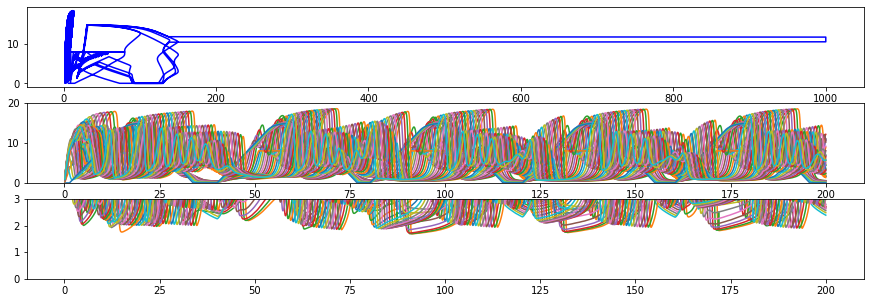

In [129]:
begin_time = 0.0
end_time = 500.0


trajectory_dict_temp = sim_sweep_with_attack_results[7]

veh_ids = (trajectory_dict_temp.keys())
plt.figure(figsize=[15,5])

plt.subplot(3,1,1)

for veh_id in veh_ids:
    time = trajectory_dict_temp[veh_id][:,0]
    index_select = np.logical_and(time>begin_time,time<end_time)
    
    time = time[index_select]
    
    speed = trajectory_dict_temp[veh_id][:,1]
    spacing = trajectory_dict_temp[veh_id][:,2]
    
    speed = speed[index_select]
    spacing = spacing[index_select]
    
    plt.subplot(3,1,1)
    plt.plot(spacing,speed,'b')
    
    plt.subplot(3,1,2)
    plt.plot(time,speed)
    plt.ylim([0,20])
    
    plt.subplot(3,1,3)
    plt.plot(time,spacing)
    plt.ylim([0,3])

Text(0.5, 0, 'Desired control velocity')

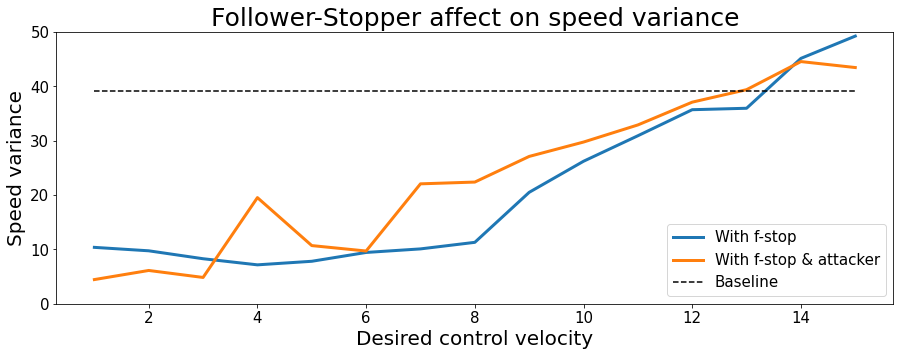

In [130]:
sim_sweep_with_attack_speed_vars = []
for trajectory_dict in sim_sweep_with_attack_results:
    sim_sweep_with_attack_speed_vars.append(get_speed_var(trajectory_dict))

plt.figure(figsize=[15,5])
plt.plot(v_des_vals,sim_sweep_speed_vars,linewidth=3.0,label='With f-stop')
plt.plot(v_des_vals,sim_sweep_with_attack_speed_vars,linewidth=3.0,label='With f-stop & attacker')
plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_var,'k--',label='Baseline')
plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim([0,50])
plt.title('Follower-Stopper affect on speed variance',fontsize=25)
plt.ylabel('Speed variance',fontsize=20)
plt.xlabel('Desired control velocity',fontsize=20)

# No F-Stop, only attacker:

In [131]:
def sim_attacker():
    #Run with just one class of driver:
    driver_controller_list = []
    num_human_drivers = 39

    a=0.666
    b=21.6
    s0=2.21
    s1=2.82
    Vm=18.94


    label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
    driver_controller_list.append([label,cfm_controller,num_human_drivers])

    #attack vehicle:

    k_1_mean = 1.5
    k_2_mean = 0.2
    h_mean = 1.8
    V_m_mean = 15.0
    d_min_mean = 10.0
    k_1 = k_1_mean# + np.random.normal(0,0.2)
    k_2 = k_2_mean# + np.random.normal(0,0.2)
    h = h_mean# + np.random.normal(0,0.2)
    V_m = V_m_mean# + np.random.normal(0,1.0)
    d_min = d_min_mean


    want_multiple_attacks = True
    Total_Attack_Duration = 10
    attack_decel_rate = -1.0
    warmup_steps = 0
    SS_Threshold_min = 30.0
    SS_Threshold_range = 0.0
    display_attack_info = True

    adversary = (ACC_Switched_Controller_Attacked, {'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min,
                                                    'want_multiple_attacks':want_multiple_attacks,
                                                    'Total_Attack_Duration':Total_Attack_Duration,
                                                    'attack_decel_rate':attack_decel_rate,
                                                    'warmup_steps':warmup_steps,
                                                    'SS_Threshold_min':SS_Threshold_min,
                                                    'SS_Threshold_range':SS_Threshold_range,
                                                    'display_attack_info':display_attack_info})

    label_adv = 'RDA_adv_TDA_'+str(np.round(Total_Attack_Duration,2))+'_ADR_'+str(np.round(attack_decel_rate,2))

    driver_controller_list.append([label_adv,adversary,1])


    # Simulation components:

    ring_length = 500
    sim_time = 200


    sim_res_list_1_attacker = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                              ring_length=ring_length,
                                                              sim_time=sim_time)


    emission_path = os.path.join(os.getcwd(),sim_res_list_1_attacker[1])

    reload(sim_processing_utils)

    trajectory_dict_1_attacker = get_trajectory_timeseries(csv_path = emission_path)
    
    return trajectory_dict_1_attacker

print('Simulation for 1 attacker defined.')

Simulation for 1 attacker defined.


In [132]:
sim_with_only_attack_results = sim_attacker()

Number of classes of driver: 2
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 40.1
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 70.10000000000001
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 80.2
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 110.2
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 120.7
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 150.70000000000002
Attack finished:RDA_adv_TDA_10_ADR_-1.0_0, -1.0, 10, 160.8
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 190.8


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 446.52269054754026
data/ring_variable_cfm_20230109-1702061673305326.857013-0_emission.csv data
Average, std velocities: 6.226743687453104, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 446.52269054754026, 0.0
Total time: 17.174630165100098
steps/second: 134.91664086630436
Data loaded, total time: 0.6699180603027344


In [133]:
speed_var_only_attack = get_speed_var(sim_with_only_attack_results)

Text(0.5, 0, 'Desired control velocity')

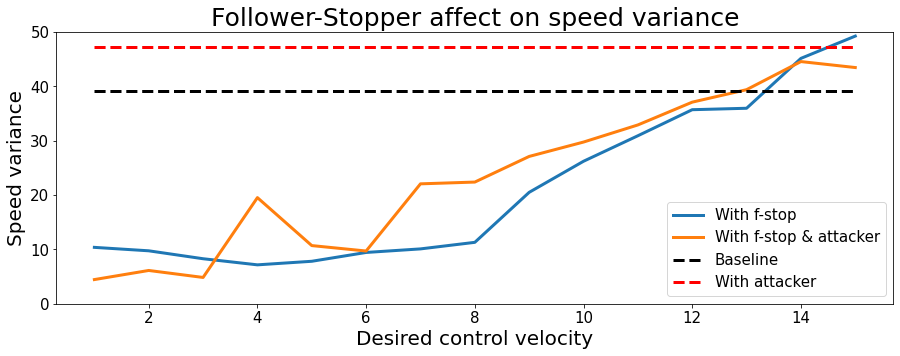

In [136]:
sim_sweep_with_attack_speed_vars = []
for trajectory_dict in sim_sweep_with_attack_results:
    sim_sweep_with_attack_speed_vars.append(get_speed_var(trajectory_dict))

plt.figure(figsize=[15,5])

plt.plot(v_des_vals,sim_sweep_speed_vars,linewidth=3.0,label='With f-stop')
plt.plot(v_des_vals,sim_sweep_with_attack_speed_vars,linewidth=3.0,label='With f-stop & attacker')
plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_var,'k--',linewidth=3.0,label='Baseline')
plt.plot(v_des_vals,np.array(v_des_vals)*0+speed_var_only_attack,'r--',linewidth=3.0,label='With attacker')

plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim([0,50])
plt.title('Follower-Stopper affect on speed variance',fontsize=25)
plt.ylabel('Speed variance',fontsize=20)
plt.xlabel('Desired control velocity',fontsize=20)

# Does ordering of RDA vs F-Stop matter?

In [173]:
reload(utils)


driver_controller_list = []

#human drivers:
num_human_drivers = 38

a=0.666
b=21.6
s0=2.21
s1=2.82
Vm=18.94

label = 'bando_ftl_ovm_a'+str(a)+'_b'+str(b)+'_s0'+str(s0)+'_s1'+str(s1)+'_Vm'+str(Vm)
cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})
driver_controller_list.append([label,cfm_controller,num_human_drivers])



# follower-stopper
v_des = 6.0
fstop_controller = (FollowerStopper,{'v_des':v_des})
label = 'FollowerStopper_Vdes_'+str(v_des)
driver_controller_list.append([label,fstop_controller,1])

#attack vehicle:
k_1_mean = 1.5
k_2_mean = 0.2
h_mean = 1.8
V_m_mean = 15.0
d_min_mean = 10.0
k_1 = k_1_mean# + np.random.normal(0,0.2)
k_2 = k_2_mean# + np.random.normal(0,0.2)
h = h_mean# + np.random.normal(0,0.2)
V_m = V_m_mean# + np.random.normal(0,1.0)
d_min = d_min_mean


want_multiple_attacks = True
Total_Attack_Duration = 10
attack_decel_rate = -1.0
warmup_steps = 0
SS_Threshold_min = 30.0
SS_Threshold_range = 0.0
display_attack_info = True

adversary = (ACC_Switched_Controller_Attacked, {'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min,
                                                'want_multiple_attacks':want_multiple_attacks,
                                                'Total_Attack_Duration':Total_Attack_Duration,
                                                'attack_decel_rate':attack_decel_rate,
                                                'warmup_steps':warmup_steps,
                                                'SS_Threshold_min':SS_Threshold_min,
                                                'SS_Threshold_range':SS_Threshold_range,
                                                'display_attack_info':display_attack_info})

label_adv = 'RDA_adv_TDA_'+str(np.round(Total_Attack_Duration,2))+'_ADR_'+str(np.round(attack_decel_rate,2))

driver_controller_list.append([label_adv,adversary,1])


# Simulation components:

ring_length = 500
sim_time = 200


want_render = True
want_shuffle = False


sim_res_list_1_smoother_1_attacker = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                                     want_render=want_render,
                                                                     want_shuffle=want_shuffle,
                                                                     ring_length=ring_length,
                                                                     sim_time=sim_time)


emission_path = os.path.join(os.getcwd(),sim_res_list_1_smoother_1_attacker[1])

reload(sim_processing_utils)

trajectory_dict_1_smoother_1_attacker_ordered = get_trajectory_timeseries(csv_path = emission_path)
    

Number of classes of driver: 3
Running ring simulation, ring length: 500
Spawning compromised ACC, attack frequency: 30.0
Will engage in multiple attacks.
Beginning attack: RDA_adv_TDA_10_ADR_-1.0_0 Time: 30.0


FatalTraCIError: connection closed by SUMO

In [140]:
from misc import sim_attacker_follows_smoother,sim_attacker_precedes_smoother

In [150]:
import misc
reload(misc)
from misc import sim_attacker_follows_smoother,sim_attacker_precedes_smoother

sim_results_list_attacker_follows_smoother = []

# v_des_vals_temp = [10.0,11.0,12.0,13.0,14.0,15.0]


for v_des in v_des_vals:
    print('Simulating with v_des = '+str(v_des))
    sim_results_list_attacker_follows_smoother.append(sim_attacker_follows_smoother(v_des))
    

Simulating with v_des = 1.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 214.89017074217108
data/ring_variable_cfm_20230110-1155271673373327.7390919-0_emission.csv data
Average, std velocities: 1.3524294577181075, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 214.89017074217108, 0.0
Total time: 17.326385021209717
steps/second: 135.67766010125044
Data loaded, total time: 0.6557600498199463
Simulating with v_des = 2.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 323.0094786926071
data/ring_variable_cfm_20230110-1155461673373346.888459-0_emission.csv data
Average, std velocities: 2.2984995388171146, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 323.0094786926071, 0.0
Total time: 17.028995990753174
steps/second: 138.9375830877949
Data loaded, total time: 0.6690709590911865
Simulating with v_des = 3.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 430.906094745792
data/ring_variable_cfm_20230110-1156051673373365.743222-0_emission.csv data
Average, std velocities: 3.2124308565288575, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 430.906094745792, 0.0
Total time: 17.755095958709717
steps/second: 136.36707754806895
Data loaded, total time: 0.7942550182342529
Simulating with v_des = 4.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 529.9879220384998
data/ring_variable_cfm_20230110-1156251673373385.48051-0_emission.csv data
Average, std velocities: 4.1484915252180725, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 529.9879220384998, 0.0
Total time: 18.34644389152527
steps/second: 130.12577478201084
Data loaded, total time: 0.6424651145935059
Simulating with v_des = 5.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 593.5300082131907
data/ring_variable_cfm_20230110-1156451673373405.615029-0_emission.csv data
Average, std velocities: 5.089448711843863, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 593.5300082131907, 0.0
Total time: 17.518054962158203
steps/second: 134.12056521816658
Data loaded, total time: 0.6464550495147705
Simulating with v_des = 6.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 605.2019539246602
data/ring_variable_cfm_20230110-1157041673373424.953278-0_emission.csv data
Average, std velocities: 5.830679696676409, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 605.2019539246602, 0.0
Total time: 17.19026207923889
steps/second: 136.1152956489069
Data loaded, total time: 0.6289329528808594
Simulating with v_des = 7.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 551.8677292167034
data/ring_variable_cfm_20230110-1157231673373443.890353-0_emission.csv data
Average, std velocities: 6.012428033215146, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 551.8677292167034, 0.0
Total time: 17.228276014328003
steps/second: 135.95133562793657
Data loaded, total time: 0.6228029727935791
Simulating with v_des = 8.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 524.0743671213775
data/ring_variable_cfm_20230110-1157421673373462.856021-0_emission.csv data
Average, std velocities: 6.0349625131757145, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 524.0743671213775, 0.0
Total time: 17.599536895751953
steps/second: 134.95955529094013
Data loaded, total time: 0.6388700008392334
Simulating with v_des = 9.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 512.0548439722346
data/ring_variable_cfm_20230110-1158021673373482.276581-0_emission.csv data
Average, std velocities: 6.083623892936552, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 512.0548439722346, 0.0
Total time: 18.504472255706787
steps/second: 130.32918211964116
Data loaded, total time: 0.6552882194519043
Simulating with v_des = 10.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 500.3355838433726
data/ring_variable_cfm_20230110-1158221673373502.614893-0_emission.csv data
Average, std velocities: 6.080075258541731, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 500.3355838433726, 0.0
Total time: 17.72516703605652
steps/second: 131.22135013234808
Data loaded, total time: 0.6598210334777832
Simulating with v_des = 11.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 471.5054978340026
data/ring_variable_cfm_20230110-1158421673373522.173745-0_emission.csv data
Average, std velocities: 6.156028203740576, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 471.5054978340026, 0.0
Total time: 17.930639028549194
steps/second: 130.58948590145945
Data loaded, total time: 0.6844117641448975
Simulating with v_des = 12.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 464.65226693575704
data/ring_variable_cfm_20230110-1159011673373541.953503-0_emission.csv data
Average, std velocities: 6.158411683776753, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 464.65226693575704, 0.0
Total time: 18.19729781150818
steps/second: 129.37652127333817
Data loaded, total time: 0.6504790782928467
Simulating with v_des = 13.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_13.0_0 is greater than safe speed. Safe veloci

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 462.6680437943691
data/ring_variable_cfm_20230110-1159211673373561.996723-0_emission.csv data
Average, std velocities: 6.19403187091094, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 462.6680437943691, 0.0
Total time: 17.686404943466187
steps/second: 132.2383529739453
Data loaded, total time: 0.6647598743438721
Simulating with v_des = 14.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 456.84785009659674
data/ring_variable_cfm_20230110-1159411673373581.5360808-0_emission.csv data
Average, std velocities: 6.1645702078142355, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 456.84785009659674, 0.0
Total time: 18.0643367767334
steps/second: 132.09418012859777
Data loaded, total time: 0.6632099151611328
Simulating with v_des = 15.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe veloc

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 459.0163149585917
data/ring_variable_cfm_20230110-1200011673373601.383901-0_emission.csv data
Average, std velocities: 6.152652475806843, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 459.0163149585917, 0.0
Total time: 18.167836904525757
steps/second: 129.5097261007107
Data loaded, total time: 0.6529679298400879


In [151]:
len(sim_results_list_attacker_follows_smoother)

15

In [152]:
sim_results_list_attacker_precedes_smoother = []

for v_des in v_des_vals:
    print('Simulating with v_des = '+str(v_des))
    sim_results_list_attacker_precedes_smoother.append(sim_attacker_precedes_smoother(v_des))
    


Simulating with v_des = 1.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 230.00863674931873
data/ring_variable_cfm_20230110-1233021673375582.8363461-0_emission.csv data
Average, std velocities: 1.417373882242622, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 230.00863674931873, 0.0
Total time: 19.025946140289307
steps/second: 123.16872200164933
Data loaded, total time: 0.8029310703277588
Simulating with v_des = 2.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 408.4257916499274
data/ring_variable_cfm_20230110-1233231673375603.946049-0_emission.csv data
Average, std velocities: 2.333431635858781, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 408.4257916499274, 0.0
Total time: 19.548492908477783
steps/second: 121.80911186776889
Data loaded, total time: 0.8336930274963379
Simulating with v_des = 3.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 591.4653729364229
data/ring_variable_cfm_20230110-1233451673375625.470279-0_emission.csv data
Average, std velocities: 3.2647066239159495, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 591.4653729364229, 0.0
Total time: 20.129413843154907
steps/second: 120.11417707595534
Data loaded, total time: 0.7239789962768555
Simulating with v_des = 4.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 781.0543746106424
data/ring_variable_cfm_20230110-1234071673375647.4493551-0_emission.csv data
Average, std velocities: 4.200165493162895, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 781.0543746106424, 0.0
Total time: 21.624412059783936
steps/second: 106.79404015231326
Data loaded, total time: 0.7540609836578369
Simulating with v_des = 5.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 924.5870098016406
data/ring_variable_cfm_20230110-1234301673375670.9671612-0_emission.csv data
Average, std velocities: 5.14744294419771, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 924.5870098016406, 0.0
Total time: 21.40181875228882
steps/second: 109.4883044017247
Data loaded, total time: 0.8938989639282227
Simulating with v_des = 6.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 1007.3383735021217
data/ring_variable_cfm_20230110-1234541673375694.395255-0_emission.csv data
Average, std velocities: 6.035829055211102, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 1007.3383735021217, 0.0
Total time: 19.09518837928772
steps/second: 121.12703327656178
Data loaded, total time: 0.722567081451416
Simulating with v_des = 7.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 892.5747683181846
data/ring_variable_cfm_20230110-1235151673375715.382114-0_emission.csv data
Average, std velocities: 6.227614464537733, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 892.5747683181846, 0.0
Total time: 21.826613903045654
steps/second: 119.56819313040225
Data loaded, total time: 0.8871233463287354
Simulating with v_des = 8.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 765.4246912260874
data/ring_variable_cfm_20230110-1235391673375739.22335-0_emission.csv data
Average, std velocities: 6.0977636855411, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 765.4246912260874, 0.0
Total time: 21.219295024871826
steps/second: 114.7590668220804
Data loaded, total time: 1.7916340827941895
Simulating with v_des = 9.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 708.1115040233198
data/ring_variable_cfm_20230110-1236031673375763.3785338-0_emission.csv data
Average, std velocities: 6.0716298361551075, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 708.1115040233198, 0.0
Total time: 19.867345333099365
steps/second: 117.80734205971169
Data loaded, total time: 0.779306173324585
Simulating with v_des = 10.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 666.5962038835689
data/ring_variable_cfm_20230110-1236251673375785.174099-0_emission.csv data
Average, std velocities: 6.052067136989715, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 666.5962038835689, 0.0
Total time: 21.711966037750244
steps/second: 118.25505466876373
Data loaded, total time: 0.735407829284668
Simulating with v_des = 11.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 612.4713541910546
data/ring_variable_cfm_20230110-1236481673375808.7705312-0_emission.csv data
Average, std velocities: 6.028689862875893, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 612.4713541910546, 0.0
Total time: 19.885941982269287
steps/second: 118.04567166840845
Data loaded, total time: 0.8776280879974365
Simulating with v_des = 12.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 566.1986267469806
data/ring_variable_cfm_20230110-1237101673375830.690472-0_emission.csv data
Average, std velocities: 6.0596692316481455, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 566.1986267469806, 0.0
Total time: 25.12009906768799
steps/second: 113.48387112235534
Data loaded, total time: 0.7077476978302002
Simulating with v_des = 13.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 510.446225810213
data/ring_variable_cfm_20230110-1237371673375857.6798239-0_emission.csv data
Average, std velocities: 6.119489990413433, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 510.446225810213, 0.0
Total time: 19.601576805114746
steps/second: 119.65053113483096
Data loaded, total time: 0.7042651176452637
Simulating with v_des = 14.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity

Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_14.0_0 is greater

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 488.7625713421247
data/ring_variable_cfm_20230110-1237591673375879.12694-0_emission.csv data
Average, std velocities: 6.143348980384061, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 488.7625713421247, 0.0
Total time: 19.94858694076538
steps/second: 118.52984846751477
Data loaded, total time: 0.717796802520752
Simulating with v_des = 15.0
Number of classes of driver: 3
Running ring simulation, ring length: 500
Will engage in multiple attacks.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity c

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater than safe speed. Safe velocity clipping applied.
Speed of vehicle FollowerStopper_Vdes_15.0_0 is greater

/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 458.45838362401133
data/ring_variable_cfm_20230110-1238201673375900.9225159-0_emission.csv data
Average, std velocities: 6.18363276278804, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 458.45838362401133, 0.0
Total time: 20.20909309387207
steps/second: 115.02720259176475
Data loaded, total time: 0.7432150840759277


Text(0.5, 0, 'Desired control velocity [m/s]')

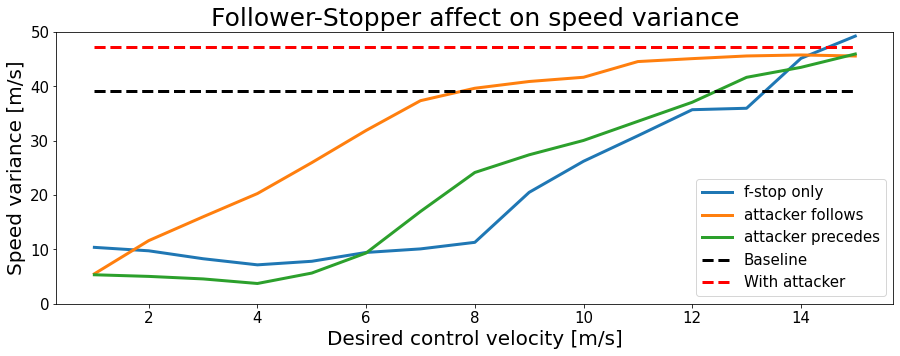

In [155]:
sim_sweep_attacker_follows_speed_vars = []
for trajectory_dict in sim_results_list_attacker_follows_smoother:
    sim_sweep_attacker_follows_speed_vars.append(get_speed_var(trajectory_dict))

    
    
sim_sweep_attacker_precedes_speed_vars = []
for trajectory_dict in sim_results_list_attacker_precedes_smoother:
    sim_sweep_attacker_precedes_speed_vars.append(get_speed_var(trajectory_dict))
    

plt.figure(figsize=[15,5])

plt.plot(v_des_vals,sim_sweep_speed_vars,linewidth=3.0,label='f-stop only')

plt.plot(v_des_vals,sim_sweep_attacker_follows_speed_vars,linewidth=3.0,label='attacker follows')

plt.plot(v_des_vals,sim_sweep_attacker_precedes_speed_vars,linewidth=3.0,label='attacker precedes')

# plt.plot(v_des_vals,sim_sweep_with_attack_speed_vars,linewidth=3.0,label='With f-stop & attacker')

plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_var,'k--',linewidth=3.0,label='Baseline')

plt.plot(v_des_vals,np.array(v_des_vals)*0+speed_var_only_attack,'r--',linewidth=3.0,label='With attacker')

plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylim([0,50])
plt.title('Follower-Stopper affect on speed variance',fontsize=25)
plt.ylabel('Speed variance [m/s]',fontsize=20)
plt.xlabel('Desired control velocity [m/s]',fontsize=20)

In [159]:
def get_speed_mean(trajcetory_dict,begin_time=50.0):
    speed_means = []
    for veh_id in trajcetory_dict:
        time = trajcetory_dict[veh_id][:,0]
        index_select = time>begin_time

        time = time[index_select]
        speed = trajcetory_dict[veh_id][:,1]
        
        speed_means.append(np.mean(speed))
    return np.mean(speed_means)

Text(0.5, 0, 'Desired control velocity [m/s]')

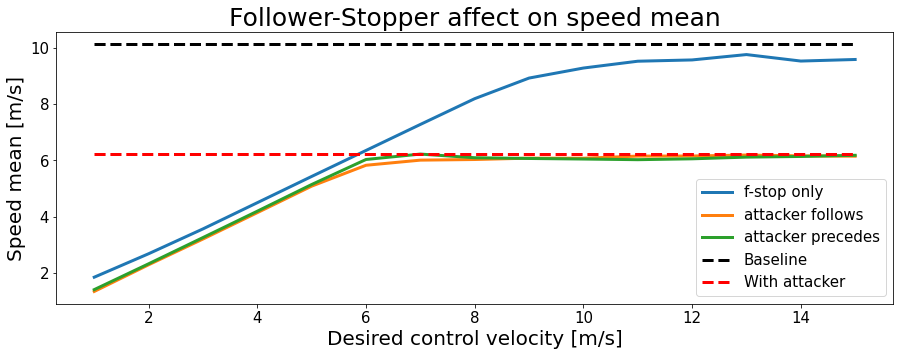

In [163]:
speed_mean_only_attack = get_speed_mean(sim_with_only_attack_results)

baseline_speed_mean = get_speed_mean(trajectory_dict_all_human)

sim_sweep_speed_means = []
for trajectory_dict in sim_sweep_results:
    sim_sweep_speed_means.append(get_speed_mean(trajectory_dict))

sim_sweep_attacker_follows_speed_means = []
for trajectory_dict in sim_results_list_attacker_follows_smoother:
    sim_sweep_attacker_follows_speed_means.append(get_speed_mean(trajectory_dict))

    
    
sim_sweep_attacker_precedes_speed_means = []
for trajectory_dict in sim_results_list_attacker_precedes_smoother:
    sim_sweep_attacker_precedes_speed_means.append(get_speed_mean(trajectory_dict))
    

plt.figure(figsize=[15,5])

plt.plot(v_des_vals,sim_sweep_speed_means,linewidth=3.0,label='f-stop only')

plt.plot(v_des_vals,sim_sweep_attacker_follows_speed_means,linewidth=3.0,label='attacker follows')

plt.plot(v_des_vals,sim_sweep_attacker_precedes_speed_means,linewidth=3.0,label='attacker precedes')

# plt.plot(v_des_vals,sim_sweep_with_attack_speed_means,linewidth=3.0,label='With f-stop & attacker')

plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_mean,'k--',linewidth=3.0,label='Baseline')

plt.plot(v_des_vals,np.array(v_des_vals)*0+speed_mean_only_attack,'r--',linewidth=3.0,label='With attacker')

plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# plt.ylim([0,50])
plt.title('Follower-Stopper affect on speed mean',fontsize=25)
plt.ylabel('Speed mean [m/s]',fontsize=20)
plt.xlabel('Desired control velocity [m/s]',fontsize=20)

In [166]:
speed_var_only_attack = get_speed_var(sim_with_only_attack_results)

baseline_speed_var = get_speed_var(trajectory_dict_all_human)

sim_sweep_speed_vars = []
for trajectory_dict in sim_sweep_results:
    sim_sweep_speed_vars.append(get_speed_var(trajectory_dict))

Text(0.5, 0, 'Speed variance [m/s]')

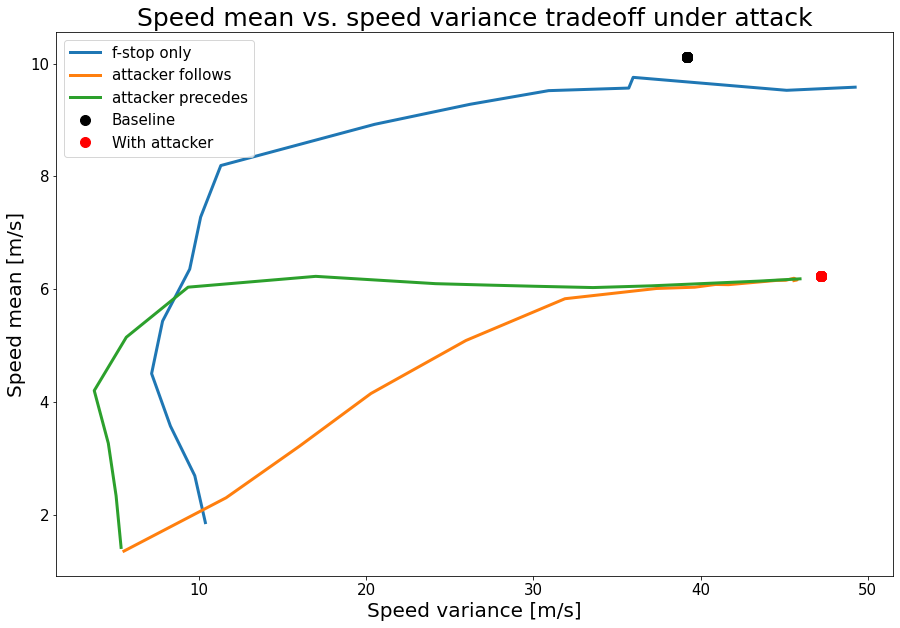

In [170]:
plt.figure(figsize=[15,10])

# plt.plot(v_des_vals,sim_sweep_speed_means,linewidth=3.0,label='f-stop only')

# plt.plot(v_des_vals,sim_sweep_attacker_follows_speed_means,linewidth=3.0,label='attacker follows')

# plt.plot(v_des_vals,sim_sweep_attacker_precedes_speed_means,linewidth=3.0,label='attacker precedes')

# plt.plot(v_des_vals,np.array(v_des_vals)*0+baseline_speed_mean,'k--',linewidth=3.0,label='Baseline')

# plt.plot(v_des_vals,np.array(v_des_vals)*0+speed_mean_only_attack,'r--',linewidth=3.0,label='With attacker')




plt.plot(sim_sweep_speed_vars,sim_sweep_speed_means,linewidth=3.0,label='f-stop only')

plt.plot(sim_sweep_attacker_follows_speed_vars,sim_sweep_attacker_follows_speed_means,linewidth=3.0,label='attacker follows')

plt.plot(sim_sweep_attacker_precedes_speed_vars,sim_sweep_attacker_precedes_speed_means,linewidth=3.0,label='attacker precedes')

plt.plot(np.array(v_des_vals)*0+baseline_speed_var,np.array(v_des_vals)*0+baseline_speed_mean,'k.',markersize=20.0,label='Baseline')

plt.plot(np.array(v_des_vals)*0+speed_var_only_attack,np.array(v_des_vals)*0+speed_mean_only_attack,'r.',markersize=20.0,label='With attacker')



plt.legend(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
# plt.ylim([0,50])
plt.title('Speed mean vs. speed variance tradeoff under attack',fontsize=25)
plt.ylabel('Speed mean [m/s]',fontsize=20)
plt.xlabel('Speed variance [m/s]',fontsize=20)

# Old scratch work:

In [63]:
driver_controller_list = []

#cfm parameters:
a_mean=0.666
b_mean=21.6
s0_mean=2.21
s1_mean=2.82
Vm_mean=8.94

#lane-change parameters:

left_delta_mean = 0.5
right_delta_mean = 0.3
left_beta_mean=1.5
right_beta_mean=1.5
switching_threshold_mean = 5.0

num_human_drivers = 35

for i in range(num_human_drivers):
    a = a_mean + np.random.normal(0,0.1)
    b = b_mean + np.random.normal(0,0.5)
    s0 = s0_mean + np.random.normal(0,0.2)
    s1 = s1_mean + np.random.normal(0,0.2)
    Vm = Vm_mean + np.random.normal(0,0.5)

    left_delta = left_delta_mean + np.random.normal(0,0.1)
    right_delta = right_delta_mean + np.random.normal(0,0.1)
    left_beta = left_beta_mean + np.random.normal(0,0.2)
    right_beta = right_beta_mean + np.random.normal(0,0.2)
    switching_threshold = switching_threshold_mean + np.random.normal(0,0.3)

    label = 'bando_ftl_ovm_a'+str(np.round(a,2))+'_b'+str(np.round(b,2))+'_s0'+str(np.round(s0,2))+'_s1'+str(np.round(s1,2))+'_Vm'+str(np.round(Vm,2))
    cfm_controller = (Bando_OVM_FTL,{'a':a,'b':b,'s0':s0,'s1':s1,'Vm':Vm,'noise':0.1})

    driver_controller_list.append([label,cfm_controller,1])

k_1_mean = 0.1
k_2_mean = 0.2
h_mean = 1.5
V_m_mean = 15.0
d_min_mean = 10.0

for i in range(5):
    k_1 = k_1_mean + np.random.normal(0,0.05)
    k_2 = k_2_mean + np.random.normal(0,0.05)
    h = h_mean + np.random.normal(0,0.2)
    V_m = V_m_mean + np.random.normal(0,1.0)
    d_min = d_min_mean

    label = 'ACC_k_1'+str(np.round(k_1,2))+'_k_2'+str(np.round(k_2,2))+'_h'+str(np.round(h,2))+'_V_m'+str(np.round(V_m,2))+'d_m'+str(np.round(d_min,2))
    cfm_controller = (ACC_Benign,{'k_1':k_1,'k_2':k_2,'h':h,'V_m':V_m,'d_min':d_min})
    driver_controller_list.append([label,cfm_controller,1])    

    
    
ring_length = 600
sim_time = 500

print('CFM list initialized.')

CFM list initialized.


In [64]:


sim_res_list_no_control = utils.run_ring_sim_variable_cfm(driver_controller_list = driver_controller_list,
                                                          ring_length=ring_length,
                                                          sim_time=sim_time)

Number of classes of driver: 40
Running ring simulation, ring length: 600


/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/envs/anti_flow/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Round 0, Return: 2277.3687125044567
data/ring_variable_cfm_20230103-1409461672776586.263715-0_emission.csv data
Average, std velocities: 5.629238151823114, 0.0
Average, std outflows: 0.0, 0.0
Average, std avg_trip_energy: nan, nan
Average, std avg_trip_time: nan, nan
Average, std total_completed_trips: 0.0, 0.0
Average, std returns: 2277.3687125044567, 0.0
Total time: 45.145676136016846
steps/second: 128.3617598369865


In [66]:
import Data_Processing.sim_processing_utils as sim_processing_utils
reload(sim_processing_utils)

from Data_Processing.sim_processing_utils import get_trajectory_timeseries

emission_path = os.path.join(os.getcwd(),sim_res_list_no_control[1])

trajectory_dict_no_control = get_trajectory_timeseries(csv_path = emission_path)



Data loaded, total time: 1.7154219150543213


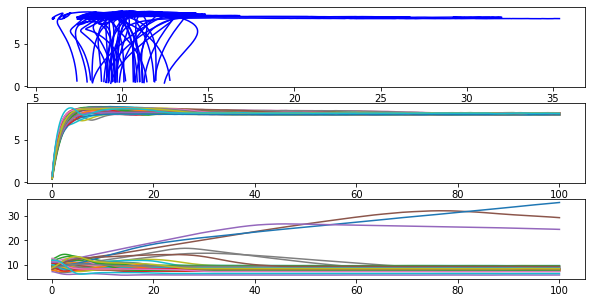

In [67]:
import matplotlib.pyplot as plt

begin_time = 0.0
end_time = 500.0

veh_ids = (trajectory_dict.keys())
plt.figure(figsize=[10,5])

plt.subplot(3,1,1)

for veh_id in veh_ids:
    time = trajectory_dict[veh_id][:,0]
    index_select = np.logical_and(time>begin_time,time<end_time)
    
    time = time[index_select]
    
    speed = trajectory_dict[veh_id][:,1]
    spacing = trajectory_dict[veh_id][:,2]
    
    speed = speed[index_select]
    spacing = spacing[index_select]
    
    plt.subplot(3,1,1)
    plt.plot(spacing,speed,'b')
    
    plt.subplot(3,1,2)
    plt.plot(time,speed)
    
    plt.subplot(3,1,3)
    plt.plot(time,spacing)